# 8.2

/var/folders/v2/5qft7fyx4md0d3vhbjvb64wr0000gn/T/ipykernel_35977/3457917267.py:62: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=X[y==cl, 1], y=X[y==cl, 2], c=y[y==cl], alpha=1, vmin = vmin, vmax = vmax, cmap=cm, edgecolors='k', marker = m)


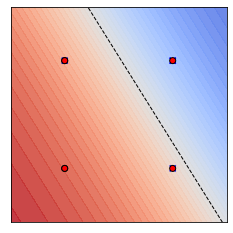

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from matplotlib.colors import ListedColormap

# 需要设置的参数
wk = np.array([0, 0, 0])		# 初始点
eta = 0.1					    # 学习率
epochs = 5000 				    # 迭代上限
epsilon = 0.01					# 梯度模长的上限

# 信用卡发放数据集
X = np.insert(np.array([[1,1], [1,1], [1,0], [0,1], [1,0], [0,1], [0,1], [0,0], [0,0], [1,1], ]), 0, 1, axis=1)	# 给每个xi第一列增加1
y = np.array([-1, -1, -1, -1, 1, 1, 1, 1, 1, 1, ])

# sigmoid 函数
def sigmoid(x):
    return 1/(1+np.exp(-x))

# 逻辑回归的假设函数
def h(x):
	return sigmoid(x@wk.T)

# 经验误差函数的梯度
def drhd(w):
	ew0 = np.mean(-y*X[:, 0]*np.exp(-y*(X@w))/(1+np.exp(-y*(X@w))))
	ew1 = np.mean(-y*X[:, 1]*np.exp(-y*(X@w))/(1+np.exp(-y*(X@w))))
	ew2 = np.mean(-y*X[:, 2]*np.exp(-y*(X@w))/(1+np.exp(-y*(X@w))))
	return np.array([ew0, ew1, ew2])

# 梯度下降法
for i in range(epochs):
	drhdwk = drhd(wk)
	if np.linalg.norm(drhdwk) < epsilon:
		break
	wk = wk-eta*drhdwk

# 下面是绘制代码
# 设置字体大小
plt.rcParams.update({'font.size': 14})
# 设置subfigure
fig, ax = plt.subplots(figsize = (6, 3))
fig.subplots_adjust(left=0.25, right=0.75, top=0.999, bottom=0.001)
ax.set(xticks=[], yticks=[])

x1_min, x1_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
x2_min, x2_max = X[:, 2].min() - 0.5, X[:, 2].max() + 0.5
ax.set_xlim(x1_min, x1_max),ax.set_ylim(x2_min, x2_max)

# 绘制决策区域
resolution = 0.03
xx1, xx2 = np.meshgrid(np.arange(x1_min-0.1, x1_max+0.1, resolution), np.arange(x2_min-0.1, x2_max+0.1, resolution))
xx = np.insert(np.c_[xx1.ravel(), xx2.ravel()], 0, 1, axis=1)
Z = h(xx).reshape(xx1.shape)
ax.contourf(xx1, xx2, Z, 50, cmap="coolwarm", vmin=0, vmax=1, alpha=0.9)

# 绘制数据集
markers = ('x', 'o')
vmin, vmax = min(y), max(y)
cm = ListedColormap(('blue', 'red'))
for cl, m in zip(np.unique(y), markers):
	ax.scatter(x=X[y==cl, 1], y=X[y==cl, 2], c=y[y==cl], alpha=1, vmin = vmin, vmax = vmax, cmap=cm, edgecolors='k', marker = m)

# 绘制直线
def lh(x):
	return -wk[0]/wk[2]-wk[1]/wk[2]*x
xx1 = np.arange(x1_min-0.1, x1_max+0.1, 0.1)
ax.plot(xx1, lh(xx1), 'k--', lw=1)

plt.show()

# 8.5

/var/folders/v2/5qft7fyx4md0d3vhbjvb64wr0000gn/T/ipykernel_35977/96287396.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=1, c=color, edgecolors='k', marker = m, label=label)
/Users/jiahuasong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 33457 (\N{CJK UNIFIED IDEOGRAPH-82B1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiahuasong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29923 (\N{CJK UNIFIED IDEOGRAPH-74E3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiahuasong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  fig.canvas.

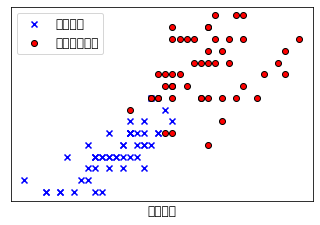

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from matplotlib.colors import ListedColormap

sampleCount = 100

# 载入iris数据集
iris = datasets.load_iris()
# 只取最后两个特征，以及取出对应的类别
X = iris.data[50:50+sampleCount, [2,3]]
y = iris.target[50:50+sampleCount]

colors = ( 'blue', 'red')
names = ( '变色鸢尾', '维吉尼亚鸢尾')

# 设置字体大小
plt.rcParams.update({'font.size': 12})
# 设置画布和坐标系
fig, ax = plt.subplots(figsize = (6, 3), nrows=1, ncols=1)
fig.subplots_adjust(left=0.15, right=0.85, top=0.999, bottom=0.1)
ax.set_xticks(()),ax.set_yticks(())

cm = ListedColormap(('blue', 'red'))
markers = ( 'x', 'o')

# 根据类别不同，绘制不同形状的点
for cl, m, label, color in zip(np.unique(y), markers, names, colors):
	ax.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=1, c=color, edgecolors='k', marker = m, label=label)
ax.legend()
ax.set_xlabel('花瓣长度')

plt.show()

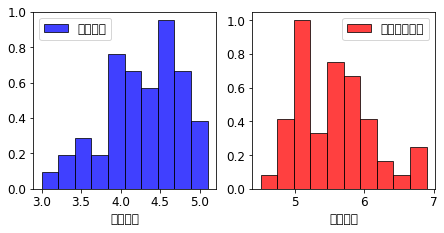

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from matplotlib.colors import ListedColormap
import scipy.stats as stats

sampleCount = 100

# 载入iris数据集
iris = datasets.load_iris()
# 只取最后两个特征，以及取出对应的类别
X = iris.data[50:50+sampleCount, [2,3]]
y = iris.target[50:50+sampleCount]

# 设置字体大小
plt.rcParams.update({'font.size': 12})
# 设置画布和坐标系
fig, axes = plt.subplots(figsize = (6, 3), nrows=1, ncols=2)
fig.subplots_adjust(left=0.06, right=0.99, top=0.97, bottom=0.15)

colors = ( 'blue', 'red')
names = ( '变色鸢尾', '维吉尼亚鸢尾')
for ax, cl, c, name, in zip(axes, np.unique(y), colors, names):
    # 绘制直方图，desity 为 True，表示绘制的是概率密度
	ax.hist(X[y==cl, 0], 10, label=name, facecolor=c, ec='k', alpha=0.75, density=True)
	ax.legend()
	ax.set_xlabel('花瓣长度')

plt.show()

In [4]:
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
sampleCount = 100
# 以下是训练代码
# 载入iris数据集
iris = datasets.load_iris()
# 只取最后两个特征，以及取出对应的类别
X = iris.data[50:50+sampleCount, [2,3]]
y = iris.target[50:50+sampleCount]

# 计算“变色鸢尾”的参数
x1 = X[y==1,0]		#只取出“花瓣长度”这个特征
mu1 =np.mean(x1) 	#计算均值
sigma1 =np.std(x1)	#计算标准差

# 计算“维吉尼亚鸢尾”的参数
x2 = X[y==2,0]		#只取出“花瓣长度”这个特征
mu2 =np.mean(x2) 	#计算均值
sigma2 =np.std(x2)	#计算标准差

print('变色鸢尾的均值 ≈ {:.2f}, 标准差 ≈ {:.2f}'.format(mu1, sigma1))

print('维吉尼亚鸢尾的均值 ≈ {:.2f}, 标准差 ≈ {:.2f}'.format(mu2, sigma2))

变色鸢尾的均值 ≈ 4.26, 标准差 ≈ 0.47
维吉尼亚鸢尾的均值 ≈ 5.55, 标准差 ≈ 0.55


In [5]:
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
sampleCount = 70
# 以下是训练代码
# 载入iris数据集
iris = datasets.load_iris()
# 只取最后两个特征，以及取出对应的类别
X = iris.data[50:50+sampleCount, [2,3]]
y = iris.target[50:50+sampleCount]

# 计算“变色鸢尾”的参数
x1 = X[y==1,0]		#只取出“花瓣长度”这个特征
mu1 =np.mean(x1) 	#计算均值
sigma1 =np.std(x1)	#计算标准差

# 计算“维吉尼亚鸢尾”的参数
x2 = X[y==2,0]		#只取出“花瓣长度”这个特征
mu2 =np.mean(x2) 	#计算均值
sigma2 =np.std(x2)	#计算标准差

print('变色鸢尾的均值 ≈ {:.2f}, 标准差 ≈ {:.2f}'.format(mu1, sigma1))

print('维吉尼亚鸢尾的均值 ≈ {:.2f}, 标准差 ≈ {:.2f}'.format(mu2, sigma2))

变色鸢尾的均值 ≈ 4.26, 标准差 ≈ 0.47
维吉尼亚鸢尾的均值 ≈ 5.66, 标准差 ≈ 0.62
